# Proje 2 - Scikit-learn ile Makine Öğrenmesi (120 puan)

* Aşağıdaki sorularda belirtilen problemlerin çözümlerini (istenilenleri yerine getirerek) ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Proje teslimi __29.06.2023 Perşembe saat 23:59’e kadar yapılırsa projeniz 120 puan üzerinden değerlendirilecek ve final sınavı notu yerine geçecektir, 03.07.2023 Pazartesi saat 23:59’e kadar yapılırsa projeniz 100 puan üzerinden değerlendirilecek ve bütünleme sınavı notu yerine geçecektir__.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız. Ayrıca olası güncelleme ve/veya açıklamalar için forumu takip ediniz.

**Açıklamalar:**
* Projede ekte verilen bir derse kaydolan öğrencilerin dönem boyunca katıldıkları farklı ölçme ve değerlendirme etkinliklerine ilişkin verileri içeren "Donem Sonu.xls" adlı dosya kullanılacaktır. Dosyadaki sütunlar, soldan sağa doğru etkinliklerin gerçekleştikleri zaman sırasına göre yer almaktadır. Not: Dersten başarılı olmak için şartlardan birisi, final sınavından 45 ve üstü not almaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (uygun ve etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  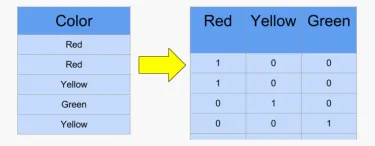
  3. Kategorik olmayan sütunlarda normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise 'k-fold cross-validation' ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hiper-parametre aramasını (hyper-parameter tunning) 'k-fold cross-validation' ile yapınız (GridSearchCV modülünü kullanabilirsiniz) ve test verisi üzerinde probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz. Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

### Soru 1: Bir öğrencinin ara sınav notunun tahminlenmesi (40 puan)

Mean Squared Error: 0.03289783741511565
R-squared Score: 0.24817259835225225
Linear Regression Performance:
               Metric     Value
0  Mean Squared Error  0.032898
1     R-squared Score  0.248173


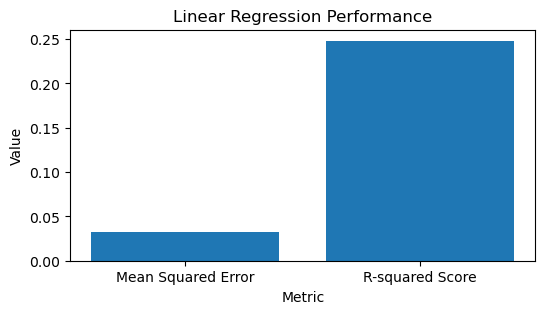

Cross-Validated Mean Squared Error: 0.026546192007122948
Cross-Validated R-squared Score: 0.4970296979343152

Linear Regression Cross-Validation Performance:
                               Metric     Value
0   Cross-Validated Mean Squeared Err  0.026546
1     Cross-Validated R-squared Score  0.497030


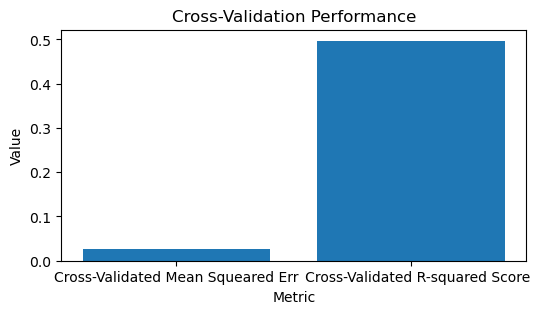

Random Forest - Mean Squared Error: 0.02532349204075016
Random Forest - R-squared Score: 0.4212721346571928

Random Forest Performance:
                               Metric     Value
0    Random Forest - Mean Squared Err  0.025323
1     Random Forest - R-squared Score  0.421272


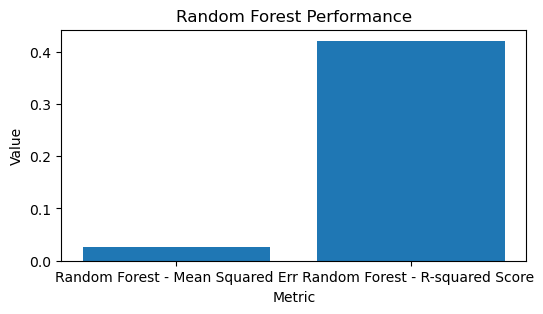

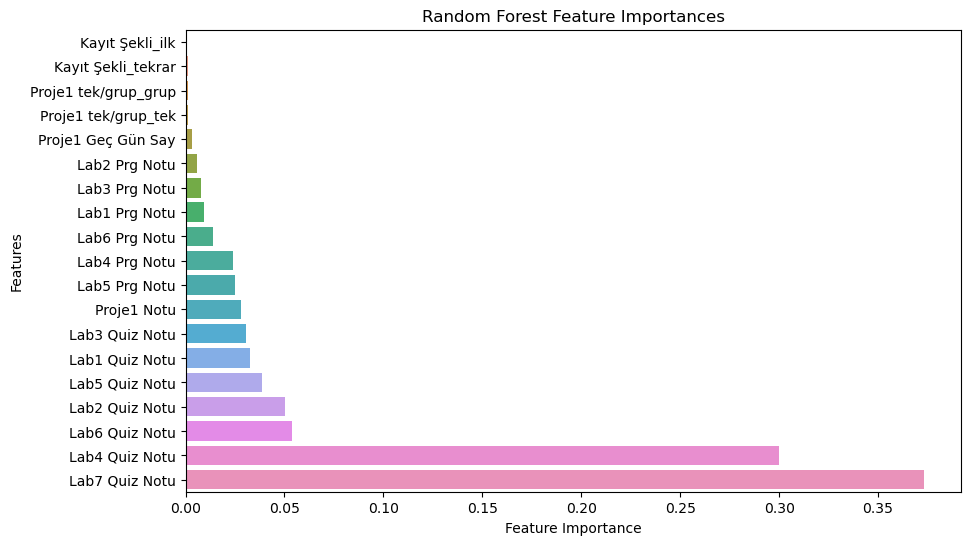

Formatted predictions for the new data:
['86.80']
[94]


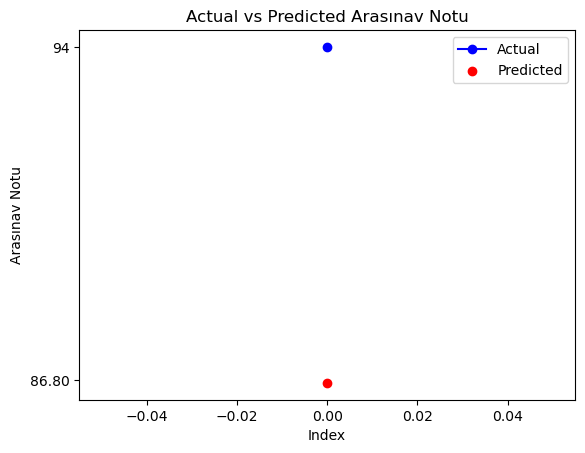

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Load the data
data = pd.read_excel("Donem Sonu.xls")

# Step 2: Select relevant attributes
attributes = ["Kayıt Şekli", "Lab1 Quiz Notu", "Lab1 Prg Notu", "Lab2 Quiz Notu", "Lab2 Prg Notu", "Lab3 Quiz Notu", "Lab3 Prg Notu", "Lab4 Quiz Notu", "Lab4 Prg Notu", "Lab5 Quiz Notu", "Lab5 Prg Notu", "Lab6 Quiz Notu", "Lab6 Prg Notu", "Lab7 Quiz Notu", "Proje1 Notu", "Proje1 Geç Gün Say", "Proje1 tek/grup", "Arasınav Notu"]

data = data[attributes]

# Step 3: Convert categorical columns to one-hot encoding
categorical_columns = ["Kayıt Şekli", "Proje1 tek/grup"]
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Step 4: Perform normalization on non-categorical columns
non_categorical_columns = [col for col in data_encoded.columns if col not in categorical_columns]
scaler = MinMaxScaler()
data_encoded[non_categorical_columns] = scaler.fit_transform(data_encoded[non_categorical_columns])

# Step 5: Prepare the data for modeling (features and target)
features = data_encoded.drop("Arasınav Notu", axis=1)  # Excluding the midterm grade column for training
target = data_encoded["Arasınav Notu"]

# Step 6: Train your prediction model (e.g., regression model)
# Split the data into training and testing sets if necessary
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 7: Evaluate the performance of your model
# Use appropriate metrics for regression, such as mean squared error, R-squared, etc.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Print Mean Squared Error and R-squared Score
result_table = pd.DataFrame({"Metric": ["Mean Squared Error", "R-squared Score"],
                             "Value": [mse, r2]})
print("Linear Regression Performance:")
print(result_table)

# Plot Linear Regression Performance
plt.figure(figsize=(6, 3))
plt.bar(result_table["Metric"], result_table["Value"])
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Linear Regression Performance")
plt.show()


# Step 8: Perform k-fold cross-validation
cv_scores = cross_val_score(model, features, target, cv=5, scoring="neg_mean_squared_error")
cv_mse = -cv_scores.mean()
cv_r2 = cross_val_score(model, features, target, cv=5, scoring="r2").mean()
print("Cross-Validated Mean Squared Error:", cv_mse)
print("Cross-Validated R-squared Score:", cv_r2)

# Print Cross-Validated Mean Squared Error and R-squared Score
cv_result_table = pd.DataFrame({"Metric": ["Cross-Validated Mean Squeared Err", "   Cross-Validated R-squared Score"],
                                "Value": [cv_mse, cv_r2]})
print("\nLinear Regression Cross-Validation Performance:")
print(cv_result_table)

# Plot Cross-Validation Performance
plt.figure(figsize=(6, 3))
plt.bar(cv_result_table["Metric"], cv_result_table["Value"])
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Cross-Validation Performance")
plt.show()


# Step 9: Develop additional models with different features and methods (if necessary)
# You can try different algorithms or feature combinations to improve the model's performance
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared Score:", r2_rf)

# Print Random Forest Mean Squared Error and R-squared Score
rf_result_table = pd.DataFrame({"Metric": ["Random Forest - Mean Squared Err", "   Random Forest - R-squared Score"],
                                "Value": [mse_rf, r2_rf]})
print("\nRandom Forest Performance:")
print(rf_result_table)

# Plot Random Forest Performance
plt.figure(figsize=(6, 3))
plt.bar(rf_result_table["Metric"], rf_result_table["Value"])
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Random Forest Performance")
plt.show()


# Step 10: Calculate and visualize feature importances
feature_importances = model_rf.feature_importances_
feature_names = features.columns
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.show()

# Step 11: Predict using the best model for new data
## Step 1: Load the data
new_data = pd.read_excel("new_data.xlsx")

## Step 2: Select relevant attributes and apply the same preprocessing as before
new_data = new_data[attributes]
new_data_encoded = pd.get_dummies(new_data, columns=categorical_columns, drop_first=True)  # Set drop_first=True to drop one column per encoded categorical feature

# Ensure column consistency between training and new data
new_data_encoded = new_data_encoded.reindex(columns=new_data_encoded.columns, fill_value=0)

# Add missing columns to new_data_encoded if they are not present in the new data
missing_columns = set(features.columns) - set(new_data_encoded.columns)
for col in missing_columns:
    new_data_encoded[col] = 0

# Scale the numerical columns in the new data
new_data_encoded[non_categorical_columns] = scaler.transform(new_data_encoded[non_categorical_columns])

## Step 3: Prepare the new data for prediction
new_features = new_data_encoded.drop("Arasınav Notu", axis=1)
new_target = [new_data["Arasınav Notu"].iloc[0]]

## Step 4: Use the trained random forest model to make predictions
predictions = model_rf.predict(new_features)

## Step 5: Format the predictions
formatted_predictions = [f"{pred*100:.2f}" for pred in predictions]

## Step 6: Display the formatted predictions
print("Formatted predictions for the new data:")
print(formatted_predictions)
print(new_target)
x_actual = range(len(new_target))

plt.plot(x_actual, new_target, color='blue', label='Actual', marker='o')
plt.scatter(x_actual, formatted_predictions, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Arasınav Notu')
plt.title('Actual vs Predicted Arasınav Notu')
plt.legend()

# Add text labels for each point
#for i in range(len(new_target)):
#    plt.text(x_actual[i], new_target[i], str(new_target[i]), ha='center', va='bottom', color='blue')
#    plt.text(x_actual[i], formatted_predictions[i], str(formatted_predictions[i]), ha='center', va='bottom', color='red')

plt.yticks(list(new_target) + list(predictions), list(new_target) + list(formatted_predictions))


plt.show()

### Soru 2: Bir öğrencinin final sınavında baraja takılıp takılmayacağının tahminlenmesi:  (40 puan)

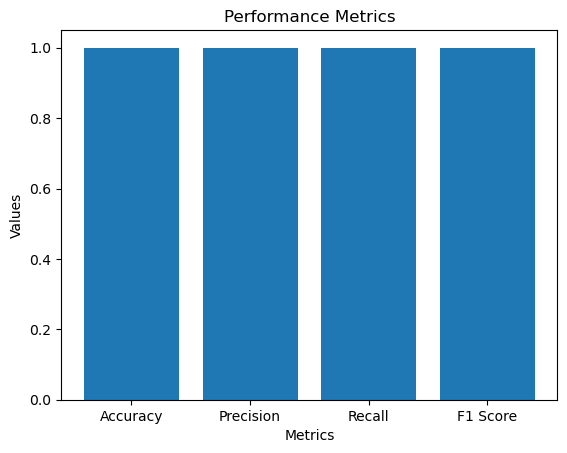

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Prediction for new data point: Fail


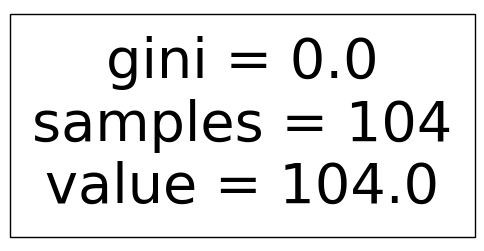

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load the data from the Excel file
data = pd.read_excel("Donem Sonu.xls")

# Step 3: Prepare the data
# Identify the attributes
features = ['Lab1 Quiz Notu', 'Lab1 Prg Notu', 'Lab2 Quiz Notu', 'Lab2 Prg Notu', 'Lab3 Quiz Notu',
            'Lab3 Prg Notu', 'Lab4 Quiz Notu', 'Lab4 Prg Notu', 'Lab5 Quiz Notu', 'Lab5 Prg Notu',
            'Lab6 Quiz Notu', 'Lab6 Prg Notu', 'Lab7 Quiz Notu', 'Proje1 Notu', 'Arasınav Notu',
            'Lab8 Quiz Notu', 'Lab8 Prg Notu', 'Lab9 Quiz Notu', 'Lab9 Prg Notu', 'Lab10 Quiz Notu',
            'Lab10 Prg Notu', 'Proje2 Notu', 'Final Sınavı Notu']

target = 'Final Fail'  # Create a new column for the target variable 'Final Fail' (1 if fail, 0 if pass)

# Convert categorical columns to binary vector representation
categorical_columns = ['Kayıt Şekli', 'Proje1 tek/grup', 'Proje2 tek/grup']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Perform normalization on non-categorical columns
scaler = MinMaxScaler()
data_encoded[features] = scaler.fit_transform(data_encoded[features])

# Add 'Final Fail' column based on predicted final exam grade
X = data_encoded[features]
y = (data_encoded['Final Sınavı Notu'] < 45).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the decision tree classifier
model = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Visualize the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.bar(metrics, values)
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

# Step 5: Predict for a new data point
new_data = pd.DataFrame([[0.8, 0.9, 0.7, 0.6, 0.9, 0.8, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.8, 0.7, 0.9, 0.8, 0.7, 0.8, 0.9, 0.7, 1, 0, 0]],
                        columns=features) # Remove the last 3 categorical columns

# Manually add missing categorical columns to new_data
new_data['Kayıt Şekli'] = 0
new_data['Proje1 tek/grup'] = 0
new_data['Proje2 tek/grup'] = 0

new_data_encoded = pd.get_dummies(new_data, columns=categorical_columns)
new_data_encoded[features] = scaler.transform(new_data_encoded[features])

# Ensure the order of columns is consistent with the trained model
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

prediction = best_model.predict(new_data_encoded)

if prediction[0] == 1:
    prediction_label = "Fail"
else:
    prediction_label = "Pass"

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Prediction for new data point:", prediction_label)

# Visualize the decision tree
plt.figure(figsize=(6, 3))
plot_tree(best_model, feature_names=X.columns, class_names=['Pass', 'Fail'], filled=True)
plt.show()


### Soru 3: Öğrencilerin benzerliklerine göre gruplara ayrılması (40 puan)

Cluster Counts:
0    52
1    49
2    29
Name: Cluster, dtype: int64

Agglomerative Cluster Counts:
0    87
1    35
2     8
Name: Agglomerative Cluster, dtype: int64

DBSCAN Cluster Counts:
 0    80
-1    47
 1     3
Name: DBSCAN Cluster, dtype: int64


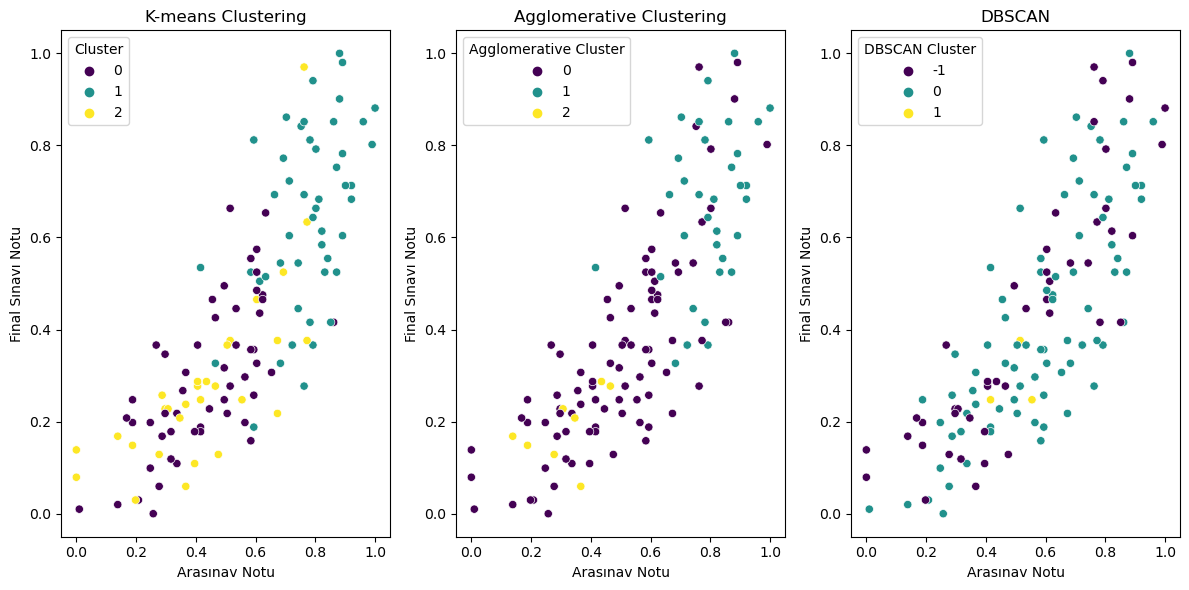

In [29]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data from the Excel file
data = pd.read_excel("Donem Sonu.xls")

# Step 3: Prepare the data
# Identify the attributes relevant for clustering
attributes = ['Lab1 Quiz Notu', 'Lab1 Prg Notu', 'Lab2 Quiz Notu', 'Lab2 Prg Notu',
              'Lab3 Quiz Notu', 'Lab3 Prg Notu', 'Lab4 Quiz Notu', 'Lab4 Prg Notu',
              'Lab5 Quiz Notu', 'Lab5 Prg Notu', 'Lab6 Quiz Notu', 'Lab6 Prg Notu',
              'Lab7 Quiz Notu', 'Proje1 Notu', 'Arasınav Notu', 'Lab8 Quiz Notu',
              'Lab8 Prg Notu', 'Lab9 Quiz Notu', 'Lab9 Prg Notu', 'Lab10 Quiz Notu',
              'Lab10 Prg Notu', 'Proje2 Notu', 'Final Sınavı Notu']

# Convert categorical columns to binary vector representation
categorical_columns = ['Kayıt Şekli', 'Proje1 tek/grup', 'Proje2 tek/grup']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Perform normalization on non-categorical columns
scaler = MinMaxScaler()
data_encoded[attributes] = scaler.fit_transform(data_encoded[attributes])

# Step 4: Apply K-means clustering
k = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_encoded[attributes])

# Step 5: Analyze and interpret the clusters
cluster_labels = kmeans.labels_
data_encoded['Cluster'] = cluster_labels

# Print the number of students in each cluster
cluster_counts = data_encoded['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# Step 6: Try other clustering algorithms and compare results
# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=k)
agglomerative.fit(data_encoded[attributes])
agglomerative_labels = agglomerative.labels_
data_encoded['Agglomerative Cluster'] = agglomerative_labels

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan_labels = dbscan.fit_predict(data_encoded[attributes])
data_encoded['DBSCAN Cluster'] = dbscan_labels

# Print the number of students in each cluster for Agglomerative Clustering
agglomerative_counts = data_encoded['Agglomerative Cluster'].value_counts()
print("\nAgglomerative Cluster Counts:")
print(agglomerative_counts)

# Print the number of students in each cluster for DBSCAN
dbscan_counts = data_encoded['DBSCAN Cluster'].value_counts()
print("\nDBSCAN Cluster Counts:")
print(dbscan_counts)

# Visualize the clusters
plt.figure(figsize=(12, 6))

# K-means Clustering
plt.subplot(1, 3, 1)
sns.scatterplot(x=data_encoded['Arasınav Notu'], y=data_encoded['Final Sınavı Notu'], hue=data_encoded['Cluster'],
                palette='viridis')
plt.title('K-means Clustering')

# Agglomerative Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(x=data_encoded['Arasınav Notu'], y=data_encoded['Final Sınavı Notu'],
                hue=data_encoded['Agglomerative Cluster'], palette='viridis')
plt.title('Agglomerative Clustering')

# DBSCAN
plt.subplot(1, 3, 3)
sns.scatterplot(x=data_encoded['Arasınav Notu'], y=data_encoded['Final Sınavı Notu'],
                hue=data_encoded['DBSCAN Cluster'], palette='viridis')
plt.title('DBSCAN')

plt.tight_layout()
plt.show()
